In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [6]:
data_te = pd.read_csv("/content/test.csv")
data_te.shape

(418, 11)

In [7]:
print(data_te.head())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [12]:
print(data_te.tail())

     PassengerId  Pclass                          Name     Sex   Age  SibSp  \
413         1305       3            Spector, Mr. Woolf    male   NaN      0   
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.5      0   
416         1308       3           Ware, Mr. Frederick    male   NaN      0   
417         1309       3      Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  


In [9]:
data_tr = pd.read_csv("/content/train.csv")
data_tr.shape

(891, 12)

In [11]:
print(data_tr.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
data_tr['Title'] = data_tr["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
print(data_tr[["Name","Title"]].head())

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


In [20]:
print(data_tr[["Name","Title"]].tail())

                                         Name Title
886                     Montvila, Rev. Juozas   Rev
887              Graham, Miss. Margaret Edith  Miss
888  Johnston, Miss. Catherine Helen "Carrie"  Miss
889                     Behr, Mr. Karl Howell    Mr
890                       Dooley, Mr. Patrick    Mr


In [26]:
rare_titles = ['Lady','Rev',"Countess", "Capt", "Col", "Don", "Dr", "Major", "Sir", "Jonkheer", "Dona"]
data_tr['Title'] = data_tr['Title'].replace(rare_titles, "Rare")

TypeError: list indices must be integers or slices, not str

In [27]:
type(data_tr)

list

In [28]:
data_tr = pd.read_csv("train.csv")   # or however you loaded it


In [30]:
data_tr['Title'] = data_tr["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
print(data_tr[["Name","Title"]].head())


                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


In [33]:
rare_titles = ['Lady','Rev',"Countess", "Capt", "Col", "Don", "Dr", "Major", "Sir", "Jonkheer", "Dona"]
data_tr['Title'] = data_tr['Title'].replace(rare_titles, "Rare")

print(data_tr["Title"].head())

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object


In [34]:
print(data_tr["Title"].tail())

886    Rare
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, dtype: object


In [35]:
data_tr = data_tr.drop("Name", axis=1)
print(data_tr.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked Title  
0         A/5 21171   7.2500   NaN        S    Mr  
1          PC 17599  71.2833   C85        C   Mrs  
2  STON/O2. 3101282   7.9250   NaN        S  Miss  
3            113803  53.1000  C123        S   Mrs  
4            373450   8.0500   NaN        S    Mr  


In [37]:
data_tr['Title'] = data_tr['Title'].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})
print(data_tr.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked Title  
0         A/5 21171   7.2500   NaN        S    Mr  
1          PC 17599  71.2833   C85        C   Mrs  
2  STON/O2. 3101282   7.9250   NaN        S  Miss  
3            113803  53.1000  C123        S   Mrs  
4            373450   8.0500   NaN        S    Mr  


In [38]:
data_te['Title'] = data_te["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
print(data_te[["Name","Title"]].head())

                                           Name Title
0                              Kelly, Mr. James    Mr
1              Wilkes, Mrs. James (Ellen Needs)   Mrs
2                     Myles, Mr. Thomas Francis    Mr
3                              Wirz, Mr. Albert    Mr
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   Mrs


In [40]:
rare_titles = ['Lady','Rev',"Countess", "Capt", "Col", "Don", "Dr", "Major", "Sir", "Jonkheer", "Dona"]
data_te['Title'] = data_tr['Title'].replace(rare_titles, "Rare")

print(data_te["Title"].head())

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object


In [41]:
data_te['Title'] = data_te['Title'].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})
print(data_te.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked Title  
0  34.5      0      0   330911   7.8292   NaN        Q    Mr  
1  47.0      1      0   363272   7.0000   NaN        S   Mrs  
2  62.0      0      0   240276   9.6875   NaN        Q  Miss  
3  27.0      0      0   315154   8.6625   NaN        S   Mrs  
4  22.0      1      1  3101298  12.2875   NaN        S    Mr  


In [42]:
data_te = data_te.drop("Name", axis=1)
print(data_te.head())

   PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    male  27.0      0      0   315154   8.6625   NaN   
4          896       3  female  22.0      1      1  3101298  12.2875   NaN   

  Embarked Title  
0        Q    Mr  
1        S   Mrs  
2        Q  Miss  
3        S   Mrs  
4        S    Mr  


In [51]:
data_tr = data_tr.drop(["Cabin","Ticket","PassengerId"],axis=1)


KeyError: "['Cabin', 'Ticket', 'PassengerId'] not found in axis"

In [52]:
data_tr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [53]:
data_te = data_te.drop(["Cabin","Ticket"],axis=1)
data_te.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Miss
3,895,3,male,27.0,0,0,8.6625,S,Mrs
4,896,3,female,22.0,1,1,12.2875,S,Mr


In [56]:
data_tr['Sex'] = data_tr['Sex'].map({'male':1,'female':2}).astype(int)
print(data_tr.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked Title
0         0       3    1  22.0      1      0   7.2500        S    Mr
1         1       1    2  38.0      1      0  71.2833        C   Mrs
2         1       3    2  26.0      0      0   7.9250        S  Miss
3         1       1    2  35.0      1      0  53.1000        S   Mrs
4         0       3    1  35.0      0      0   8.0500        S    Mr


In [57]:
data_te['Sex'] = data_te['Sex'].map({'male':1,'female':2}).astype(int)
print(data_te.head())

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare Embarked Title
0          892       3    1  34.5      0      0   7.8292        Q    Mr
1          893       3    2  47.0      1      0   7.0000        S   Mrs
2          894       2    1  62.0      0      0   9.6875        Q  Miss
3          895       3    1  27.0      0      0   8.6625        S   Mrs
4          896       3    2  22.0      1      1  12.2875        S    Mr


In [58]:
data_tr['Age'] = data_tr['Age'].fillna(data_tr['Age'].median()).astype(int)
print(data_tr.head())

   Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked Title
0         0       3    1   22      1      0   7.2500        S    Mr
1         1       1    2   38      1      0  71.2833        C   Mrs
2         1       3    2   26      0      0   7.9250        S  Miss
3         1       1    2   35      1      0  53.1000        S   Mrs
4         0       3    1   35      0      0   8.0500        S    Mr


In [59]:
data_te['Age'] = data_te['Age'].fillna(data_te['Age'].median()).astype(int)
print(data_te.head())

   PassengerId  Pclass  Sex  Age  SibSp  Parch     Fare Embarked Title
0          892       3    1   34      0      0   7.8292        Q    Mr
1          893       3    2   47      1      0   7.0000        S   Mrs
2          894       2    1   62      0      0   9.6875        Q  Miss
3          895       3    1   27      0      0   8.6625        S   Mrs
4          896       3    2   22      1      1  12.2875        S    Mr


In [60]:
data_tr["Embarked"] = data_tr["Embarked"].fillna("S")
print(data_tr.head())

   Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked Title
0         0       3    1   22      1      0   7.2500        S    Mr
1         1       1    2   38      1      0  71.2833        C   Mrs
2         1       3    2   26      0      0   7.9250        S  Miss
3         1       1    2   35      1      0  53.1000        S   Mrs
4         0       3    1   35      0      0   8.0500        S    Mr


In [61]:
data_te["Fare"] = data_te["Fare"].fillna(data_te["Fare"].median()).astype(int)
print(data_te.head())

   PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare Embarked Title
0          892       3    1   34      0      0     7        Q    Mr
1          893       3    2   47      1      0     7        S   Mrs
2          894       2    1   62      0      0     9        Q  Miss
3          895       3    1   27      0      0     8        S   Mrs
4          896       3    2   22      1      1    12        S    Mr


In [62]:
data_tr.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,1,27,0,0,13.00,S,Rare
887,1,1,2,19,0,0,30.00,S,Miss
888,0,3,2,28,1,2,23.45,S,Miss
889,1,1,1,26,0,0,30.00,C,Mr
890,0,3,1,32,0,0,7.75,Q,Mr


In [64]:
data_te.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
413,1305,3,1,27,0,0,8,S,Mr
414,1306,1,2,39,0,0,108,C,Mr
415,1307,3,1,38,0,0,7,S,Mrs
416,1308,3,1,27,0,0,8,S,Mrs
417,1309,3,1,27,1,1,22,C,Miss


In [79]:
data_tr.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,NaN,27,0,0,13.00,NaN,Rare
887,1,1,NaN,19,0,0,30.00,NaN,Miss
888,0,3,NaN,28,1,2,23.45,NaN,Miss
889,1,1,NaN,26,0,0,30.00,NaN,Mr
890,0,3,NaN,32,0,0,7.75,NaN,Mr


In [86]:
data_tr.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,NaN,27,0,0,13.00,NaN,Rare
887,1,1,NaN,19,0,0,30.00,NaN,Miss
888,0,3,NaN,28,1,2,23.45,NaN,Miss
889,1,1,NaN,26,0,0,30.00,NaN,Mr
890,0,3,NaN,32,0,0,7.75,NaN,Mr


In [92]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.00,B42,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.45,NaN,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,2.0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,3.0


In [85]:
import pandas as pd

# Load dataset again
df = pd.read_csv("train.csv")

# Map only once
df['Sex'] = df['Sex'].map({'male': 1, 'female': 2})

data_tr['Embarked'] = data_tr['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})


In [91]:
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

Text(0.5, 1.0, 'Survived (0=NO,1=YES)')

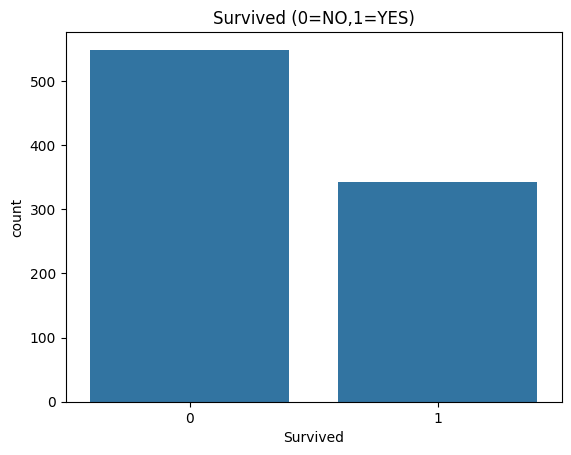

In [67]:
sns.countplot(x='Survived',data=data_tr)
plt.title("Survived (0=NO,1=YES)")

Text(0.5, 1.0, '1:Male,2:Female')

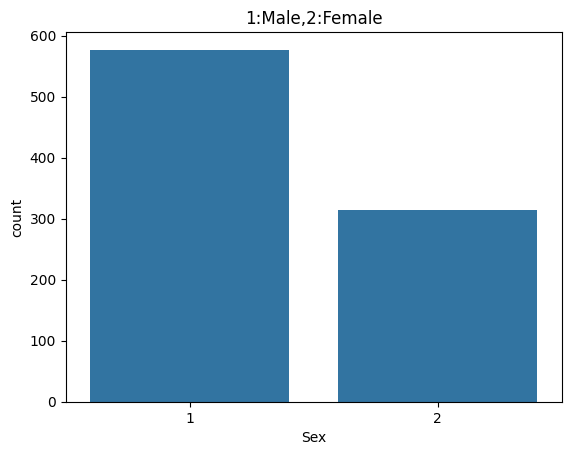

In [71]:
sns.countplot(x='Sex',data=data_tr)
plt.title("1:Male,2:Female")


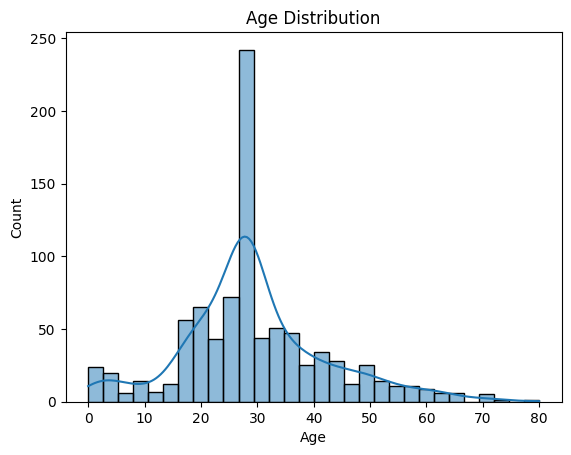

In [73]:
sns.histplot(data_tr['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

In [100]:
data_ts.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,True,False
1,893,3,0,47.0,1,0,7.0000,False,True
2,894,2,1,62.0,0,0,9.6875,True,False
3,895,3,1,27.0,0,0,8.6625,False,True
4,896,3,0,22.0,1,1,12.2875,False,True


In [93]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Make copies
data_tr = train_df.copy()
data_ts = test_df.copy()

# 2. Drop unnecessary columns
data_tr.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
data_ts.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

# 3. Handle missing values
# Age -> median
data_tr["Age"].fillna(data_tr["Age"].median(), inplace=True)
data_ts["Age"].fillna(data_ts["Age"].median(), inplace=True)

# Embarked -> mode (most common)
data_tr["Embarked"].fillna(data_tr["Embarked"].mode()[0], inplace=True)
data_ts["Embarked"].fillna(data_ts["Embarked"].mode()[0], inplace=True)

# Fare (only test set has missing)
data_ts["Fare"].fillna(data_ts["Fare"].median(), inplace=True)

# 4. Encode categorical variables
# Sex -> Male=1, Female=0
data_tr["Sex"] = data_tr["Sex"].map({"male": 1, "female": 0}).astype(int)
data_ts["Sex"] = data_ts["Sex"].map({"male": 1, "female": 0}).astype(int)

# Embarked -> One-hot encoding
data_tr = pd.get_dummies(data_tr, columns=["Embarked"], drop_first=True)
data_ts = pd.get_dummies(data_ts, columns=["Embarked"], drop_first=True)

# 5. Ensure integer type where needed
data_tr["Survived"] = data_tr["Survived"].astype(int)
data_tr["Pclass"] = data_tr["Pclass"].astype(int)
data_ts["Pclass"] = data_ts["Pclass"].astype(int)

# Final datasets
print("Training data shape:", data_tr.shape)
print("Testing data shape:", data_ts.shape)

data_tr.head()


Training data shape: (891, 9)
Testing data shape: (418, 9)


/tmp/ipython-input-4066719093.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_tr["Age"].fillna(data_tr["Age"].median(), inplace=True)
/tmp/ipython-input-4066719093.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [95]:

X = data_tr.drop("Survived", axis=1)
y = data_tr["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [97]:
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [102]:
passenger_ids = data_ts["PassengerId"]
X = data_ts.drop("PassengerId", axis=1)
predictions = model.predict(X)
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions
})
submission.to_csv("titanic_submission.csv", index=False)

In [105]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions})

print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
